# K means Clustering data

Today we will learn to code K means algorithm with a dataset.
### **If you want full mathematics intuition then go to 'bit.ly/2YYI8dq' and also for full tutorial**

**Import all necessary library**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Reading Dataset, Dataset Link: 'https://www.kaggle.com/rsadiq/salary'**

In [2]:
df = pd.read_csv("C://Users//Vicky//Downloads//Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Making a scatter plot to analyse the data**

Text(0, 0.5, 'Salary')

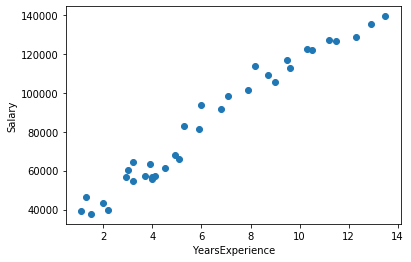

In [5]:
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

***Important    ***
     **When you are working with the K means clustering then you have to Standardise your data**
**So we have done it, have a look on it**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.YearsExperience = scaler.fit_transform(df[['YearsExperience']])
df.Salary = scaler.fit_transform(df[['Salary']])
df.head()

,YearsExperience,Salary
0,0.000000,0.015845
1,0.016129,0.083296
2,0.032258,0.000000
3,0.072581,0.056952
4,0.088710,0.021232


**After Standerdisation the graph look same but have a eye on the X units and Y units**

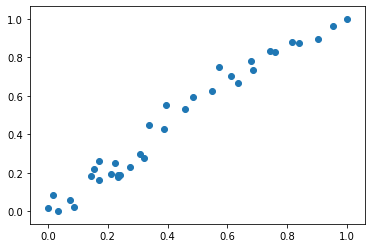

In [8]:
plt.scatter(df.YearsExperience,df.Salary)

# Now the time comes to implement the K-Means Object

**We are taking a number of clusters equals to 4 initially as randomly, but we will apply a method to find the right value of numbers of clusters**

In [56]:
KMC = KMeans(n_clusters=4)
y_predicted = KMC.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

**In this line of code we are adding a column of cluster assigned to the our salary value**

In [57]:
df['clusters']=y_predicted
df.head()

,YearsExperience,Salary,clusters
0,0.000000,0.015845,3
1,0.016129,0.083296,3
2,0.032258,0.000000,3
3,0.072581,0.056952,3
4,0.088710,0.021232,3


**the x and y location of all the clusters found**

In [58]:
KMC.cluster_centers_

array([[0.24366359, 0.25080532],
       [0.85829493, 0.89610722],
       [0.56362007, 0.65978489],
       [0.04193548, 0.03546504]])

**In this part of code we are plotting the clusters with their centroids**

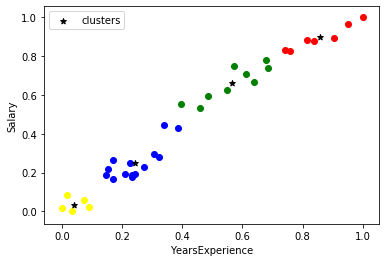

In [62]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
df4 = df[df.clusters==3]
plt.scatter(df1.YearsExperience,df1.Salary,color = 'blue')
plt.scatter(df2.YearsExperience,df2.Salary,color = 'red')
plt.scatter(df3.YearsExperience,df3.Salary,color = 'green')
plt.scatter(df4.YearsExperience,df4.Salary,color = 'yellow')
plt.scatter(KMC.cluster_centers_[:,0],KMC.cluster_centers_[:,1],color = 'black',marker='*',label='clusters')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

# Elbow Method

**In this method we are defining the list wcss in which we will append the all wcss values in the range of K**

In [64]:
wcss = []
KMC_range = range(1,10)
for k in KMC_range:
    KMC = KMeans(n_clusters=k)
    KMC.fit(df[['YearsExperience','Salary']])
    wcss.append(KMC.inertia_)

**Plotting the elbow graph to find the elbow point, for sure we have a elbow point = 3**

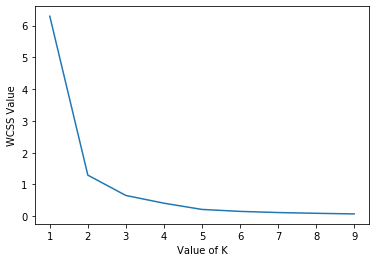

In [65]:
plt.xlabel('Value of K')
plt.ylabel('WCSS Value')
plt.plot(KMC_range,wcss)

In [77]:
KMC = KMeans(n_clusters=3)
y_predicted = KMC.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
KMC.cluster_centers_

array([[0.49283154, 0.58862655],
       [0.17030361, 0.1655222 ],
       [0.81899642, 0.86532198]])

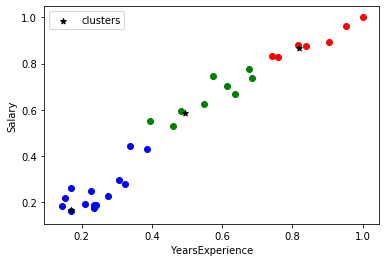

In [79]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.YearsExperience,df1.Salary,color = 'blue')
plt.scatter(df2.YearsExperience,df2.Salary,color = 'red')
plt.scatter(df3.YearsExperience,df3.Salary,color = 'green')
plt.scatter(KMC.cluster_centers_[:,0],KMC.cluster_centers_[:,1],color = 'black',marker='*',label='clusters')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

## We have got the final clusters with the centroids as *